In [1]:
import cv2
import numpy as np
import os
import tensorflowjs as tfjs
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [2]:
trainingDataset = []
classNumber = 0
img_size = 150
path = "C:\\Users\\admin\\Desktop\\data"

In [3]:
trainingDataset.clear()
for folder in (os.listdir(path)):
    print(classNumber)
    fp = os.path.join(path,folder)
    for eachImage in os.listdir(fp):
        imagePath = os.path.join(fp,eachImage)
        img = (cv2.imread(imagePath,cv2.IMREAD_GRAYSCALE))/255
        img = cv2.resize(img, (img_size, img_size))
        trainingDataset.append([img,classNumber])
    classNumber = classNumber + 1
    print(len(trainingDataset))

#print(len(trainingDataset))
#print(len(trainingDataset[0]))
#print(len(trainingDataset[0]))

0
997
1
2474


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
import pickle
import time

In [5]:
X = []
Y = []
img_size = 150
np.random.shuffle(trainingDataset)
for features, label in trainingDataset:
    X.append(features)
    Y.append(label)
print(Y) 

[0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 

In [6]:
X = np.array(X).reshape(-1, img_size, img_size, 1)
print(X.shape)
Y_binary = to_categorical(Y)
print(Y_binary)

(2474, 150, 150, 1)
[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [7]:
model = Sequential()

model.add(Conv2D(40, (3, 3), input_shape=(150,150,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


model.add(Conv2D(50, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


model.add(Conv2D(60, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(150))
model.add(Activation('relu'))
 
model.add(Dense(2))
model.add(Activation('softmax'))

In [8]:
 # NAME = "3-conv-128-layer-dense-1-out-2-softmax-categorical-cross-2-CNN"
# tensorboard = TensorBoard(log_dir="/content/drive/My Drive/fruitsData/Logs/{}".format(NAME))
import keras
import keras_metrics
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy',keras_metrics.precision(),keras_metrics.recall()])

In [9]:
 trained_model = model.fit(X, Y_binary,
          batch_size = 32,
          epochs=30, validation_split = 0.3)


Epoch 1/30
Instructions for updating:
`inputs` is now automatically inferred
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
55/55 [==============================] - 58s 1s/step - loss: 0.7208 - accuracy: 0.5858 - precision: 0.3425 - recall: 0.1090 - val_loss: 0.6754 - val_accuracy: 0.5949 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
55/55 [==============================] - 53s 955ms/step - loss: 0.6490 - accuracy: 0.6112 - precision: 0.1264 - recall: 0.0072 - val_loss: 0.6041 - val_accuracy: 0.6689 - val_precision: 0.9583 - val_recall: 0.1516
Epoch 3/30
55/55 [==============================] - 53s 958ms/step - loss: 0.5184 - accuracy: 0.7585 - precision: 0.7114 - recall: 0.5200 - val_loss: 0.5015 - val_accuracy: 0.7806 - val_precision: 0.8027 - val_recall: 0.6022
Epoch 4/30
55/55 [==============================] - 53s 967ms/step - loss: 0.4771 - accuracy: 0.7903 - precision: 0.7795 - recall: 0.6057

In [10]:
def prepare(filepath):
    img_size = 150
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)/255  
    cv2.imshow("Image",img)
    cv2.waitKey(0) # waits until a key is pressed
    cv2.destroyAllWindows()
    img_resize = cv2.resize(img, (img_size, img_size))  
    return img_resize.reshape(-1, img_size, img_size, 1)
print("hello")

hello


In [11]:
prediction = model.predict(prepare("C:\\Users\\admin\\Desktop\\testing\\77.jpg"))
print((prediction))


CATEGORIES = ["Bacterial Spot", "Healthy"]

pred_class = CATEGORIES[np.argmax(prediction)]
print(pred_class)


[[0.9489437  0.05105631]]
Bacterial Spot


tfjs.converters.save_keras_model(model, 'models')

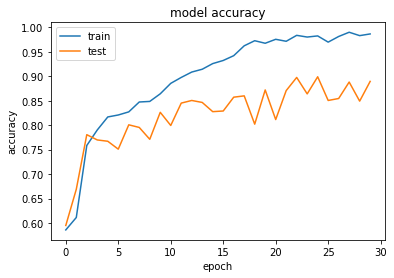

In [12]:
plt.plot(trained_model.history['accuracy'])
plt.plot(trained_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

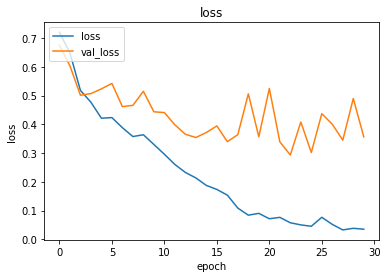

In [13]:
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'], loc='upper left')
plt.show()

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 40)      400       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 40)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 40)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 40)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 50)        18050     
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 50)        0